# D208 Predictive Modeling Performance Assessment, Task \# 2

Submitted by William J Townsend, Student ID 003397146, for WGU's MSDA program

## Table of Contents
<ul>
<li><a href="#PartA1">A1: Research Question</a></li>
<li><a href="#PartA2">A2: Objectives and Goals of Analysis</a></li>
<li><a href="#PartB1">B1: Assumptions of a Logistic Regression Model</a></li>
<li><a href="#PartB2">B2: Benefits of Chosen Tools</a></li> 
<li><a href="#PartB3">B3: Justification of Logistic Regression</a></li> 
<li><a href="#PartC1">C1: Data Preparation Goals and Necessary Manipulation</a></li>
<li><a href="#PartC2">C2: Summary Statistics</a></li>
<li><a href="#PartC3">C3: Preparation of Data</a></li>
<li><a href="#PartC4">C4: Univariate and Bivariate Distributions</a></li>
<li><a href="#PartC5">C5: Copy of Prepared Data Set</a></li>
<li><a href="#PartD1">D1: Initial Logistic Regression Model</a></li>
<li><a href="#PartD2">D2: Reduction Justification</a></li>
<li><a href="#PartD3">D3: Reduced Logistic Regression Model</a></li>
<li><a href="#PartE1">E1: Analysis of Logistic Regression Models</a></li> 
<li><a href="#PartE2">E2: Model Outputs</a></li> 
<li><a href="#PartE3">E3: Model Code</a></li>
<li><a href="#PartF1">F1: Results of Data Analysis</a></li>
<li><a href="#PartF2">F2: Recommended Action</a></li>
<li><a href="#PartG">G: Panopto Recording</a></li>
<li><a href="#PartH">H: Code References</a></li>
<li><a href="#PartI">I: Source References</a></li>    
</ul>

<a id='PartA1'></a>
## A1: Research Question

The research question that I want to examine is, "Which factors most significantly contribute to patients diagnosed with chronic back pain?" This is a broad topic, but chronic back pain is a problem for many Americans. Any hospital or healthcare system has to meet its' customers where they are, and this includes whatever ailments they have. Understanding how various ailments relate to each other, even if not specifically causal in nature, is important

<a id="#PartA2"></a>
## A2: Objectives and Goals of Analysis

By examining the relationships between several variables and a patient's diagnosis of chronic back pain, we can determine if other healthcare conditions or other patient data has any sort of detectable relationship with chronic back pain. Discovering these relationships can lead to efforts to address these potential complications, whether through patient education, treatment, or preemptive care. Hospitals are generally not a business which gets to recruit customers that it desires, nor do they get the ability to screen their customers in any particular way. At the same time, they're not even picked by the customers that they serve, as they're usually either the closest hospital to an emergency or the only hospital in a given area. As a result, hospitals have to meet their customers where they are in regards to their current health situation, including whatever ailments they have. 

Understanding how various ailments relate to each other, even if not specifically causal in nature, is important to both the customer and to the hospital, in that it provides insight into the individual's healthcare situation, including managing their current health issues and mitigating risks for new issues. The management of those current issues or mitigation of potential future issues is precisely the business of the hospital, and proactive and effective management of those concerns can help lead to better outcomes for currently hospitalized patients, while preventing tomorrow's issues, such as a patient's current hospitalization being extended, being re-hospitalized for the same issue, or even avoiding a future hospitalization for a potential complication or health risk which was avoided. 

<a id="#PartB1"></a>
## B1: Assumptions of a Logistic Regression Model

Logistic regression is a model of whether or not an event or action occurs, using one or more independent (explanatory) variables and a single dependent (response) variable. Logistic regression depends upon 6 assumptions [(Statology, 2021)](https://www.statology.org/assumptions-of-logistic-regression/):

- The response variable is binary in nature <br>
The response (y) variable is impacted by the explanatory (x) variables, but the y variable can only have two states. This generally represents a True/False or Either/Or situation, but there must only be two unique values for the y variable in a logistic regression. 

- *None of the explanatory (x) variables being compared can be significantly correlated with each other (multicollinearity)* <br>
Where x variables are closely related to each other, this confounds the logistic regression model's attempt to find a relationship between x and y, because the different x variables are essentially "talking" to each other throughout the process. The x variable's relationship to the y variable can only be ascertained if that relationship can actually be observed, and if other x variables are impacting the relationship through their multicollinearity, then that particular relationship cannot be judged because the relationship being observed is *actually* the relationship between multiple x variables and the single y variable. 

- *The observations are independent of each other* <br>
Each row in a data set represents an observation.  If an observation is related to a prior observation, we run into a similar problem as multicollinearity, where different target y values are "talking" to each other throughout the process of trying to find a relationship between x and y. 

- There are no extreme outliers <br>
Logistic regression assumes that there are no extreme outliers which negatively influence the fit of the regression line in the overall plot. The idea here is that if 99 of 100 datapoints are well represented by a regression line, and the 100th datapoint drags that regression line into a place where it no longer well describes neither the 99 datapoints or the 100th datapoint, the outlier should be eliminated. 

- There is a linear relationship between the explanatory (x) variables and the logit of the response (y) variable <br>
Where linear regression required a linear relationship between the x and y variables, logistic regression requires a linear relationship between the x variable and the logit (or log-odds) of y. This is a significant distinction, as the logit maps probability values of y (which, remember, is a binary outcome) rather than a value of y as we saw in linear regression. 

- The sample size is sufficiently large <br> 
Logistic regression requires that the sample size is large enough that valid conclusions can be drawn from the model. If there are too few instances of a given outcome from an explanatory variable, then it cannot be determined if a relationship exists between that explanatory variable and the response variable. In such a situation, an unusual datapoint could have an overly large impact on the outcome and imply a conclusion that would not hold true with additional sampling. 

<a id="#PartB2"></a>
## B2: Benefits of Chosen Tools

I will be using Python throughout this analysis project. Python is a programming language that supports data science processes very well, particularly in the use of packages designed specifically for this. Python also happens to be the only programming language that I know to any sort of significant degree. I'll also be using several Python packages to perform this analysis:
- pandas allows for the handling of the dataset in something like a large table or spreadsheet
- NumPy allows for performing certain mathematical operations or assignment of certain values within the dataset
- Seaborn and MatPlotLib provide graphing functionality
- SciPy's statsmodels provides several important functionalities for both the multiple regression model such as graphing residuals, as well as for checking problems such as multicolinearity using the variance inflation factor
- sklearn's preprocessing is useful for transforming our data, when needed

In [1]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.mosaicplot import mosaic
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# The CSV's first column is an index and Pandas will duplicate this and create an column without 'index_col=0'
df = pd.read_csv('./medical_clean.csv', index_col=0)
# Check data types and number of values, as well as overall size of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_id         10000 non-null  object 
 1   Interaction         10000 non-null  object 
 2   UID                 10000 non-null  object 
 3   City                10000 non-null  object 
 4   State               10000 non-null  object 
 5   County              10000 non-null  object 
 6   Zip                 10000 non-null  int64  
 7   Lat                 10000 non-null  float64
 8   Lng                 10000 non-null  float64
 9   Population          10000 non-null  int64  
 10  Area                10000 non-null  object 
 11  TimeZone            10000 non-null  object 
 12  Job                 10000 non-null  object 
 13  Children            10000 non-null  int64  
 14  Age                 10000 non-null  int64  
 15  Income              10000 non-null  float64
 16  Mari

In [2]:
# Visually inspect dataframe to facilitate exploration, spot problems
pd.set_option("display.max_columns", None)
df.head(5)

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3


<a id="#PartB3"></a>
## B3: Justification of Logistic Regression

Logistic regression is used to model the relationship between a binary categorical dependent variable and multiple other independent variables, which may be either continuous or categorical. This dependent variable is generally True/False or Yes/No in nature, but it could be an Either/Or of some other sort of categorical data, such as Malignant/Benign. In this case, I want to examine the relationship between several x varaibles and a patient's diagnosis of chronic back pain. This diagnosis is a categorical variable with only two possible values (Yes/No). Because the variable of interest (response variable) is a categorical variable which is binary in nature, it should be suitable for logistic regression, allowing it to be compared to a number of potential explanatory variables. 

<a id="#PartC1"></a>
## C1: Data Preparation Goals and Necessary Manipulation

While the data set provided by WGU is described as being "clean", it is not very well cleaned, including missing several fixes that were performed in D206: Data Cleaning. For example, zip codes are stored as an int64, eliminating leading zeros and assumed to be whole numbers, rather than the qualitative strings that they actually should be. Similarly, timezones are storedin 26 different non-descriptive "timezones" which should instead be standardized to the 9 US time zones. I will reapply much of the code that I previously used in my D208 Task 1 project to fix these issues, with some modifications. 

Logistic regression analysis requires numerical values be provided rather than strings for the various categorical and boolean types of data in this data set. The booleans can easily be remapped from True/False values to either 1/0 numeric values. The categorical variables will have to be handled differently, based upon whether or not they are ordinal (the order of the category values matters, such as "big", "bigger", "biggest") or nominal (order does not matter) in nature. 

There are several different categorical data types in this data set which are not boolean in nature (already handled). Of these columns, only the survey scores columns are ordinal in nature. The original intention for these columns as described in the data dictionary was that 1 = "most important" and "8" = "least important", which is somewhat unintuitive when they are numerically represented. As a result, what I'll do is actually remap these values to reflect a more intuitive pattern where `1 < 8` is actually True. Once that is done, then I can convert these columns to an ordered categorical datatype similar to what was done in D208. 

For the nominal categorical columns, those columns which are going to be used in this analysis require the generation of dummy columns, which represent categorical data in a binary numeric form. For example, the gender column contains values for Female, Male, and Nonbinary. Two columns can be created which will actually communicate the same information. If a 1 appears in the first column, then the patient is male. If a 1 appears in the second column, then the patient is nonbinary. If a 1 appears in neither column (both 0), then the patient is female. This process, called one hot encoding [(WGU Courseware Resources)](https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=15e09c73-c5aa-439d-852f-af47001b8970), allows us to easily represent string data in a numeric fashion that the regression analysis can handle. This can easily be done by using pandas' `get_dummies()` function.

These are the primary changes required for performing a logistic regression analysis on this dataset. Some other functions will be run to verify that the data is ready for multiple regression analysis, such as `info()` to make sure that there are no null values and verify the datatypes for each column, `value_counts()` to check all of the values in a column, or `describe()` to display summary statistics for a numeric column.

<a id="#PartC2"></a>
## C2: Summary Statistics

The variables which I intend to examine for this analysis include the `BackPain` variable (the dependent variable, y) and the following independent variables (the explanatory variables, x):

- Children <br>
This variable was examined in the D207 project. Where I expected to see a significantly decreasing curve as number of children increased, we instead saw several plateaus, with similar numbers patients with 5 - 10 children.

In [3]:
df.Children.value_counts().sort_index()

0     2548
1     2509
2     1475
3     1489
4      995
5      169
6      191
7      213
8      209
9      108
10      94
Name: Children, dtype: int64

- Age <br> 
Age is a variable that I expect to see have a significant relationship with chronic back pain, because it is an affliction that is generally expected to be see amongst older people in American society. 

One noticeable thing about our data from the summary statistics is that no patients are under the age of 18. I noted this as a particular limitation of my multiple regression project, where I examined lengths of hospitalization related to several variables, including age. This issue is going to be less of a problem for this analysis, because children generally do not have chronic back pain, unless they've suffered some sort of precipitating event such as an injury, serious illness, or accident. In such a circumstance, that causation is likely going to fall outside the realm of this analysis. 

In [4]:
df.Age.describe()

count    10000.000000
mean        53.511700
std         20.638538
min         18.000000
25%         36.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

- Gender <br>
I mentioned in my D206 project that this variable is flawed in the way it chooses to break down the variety of genders to only 3 possibilities. Nonetheless, this is the data that we have, so this cannot really be helped. The data reflects that about 50% of patients are female, nearly 48% are male, and just over 2% are nonbinary. 

In [5]:
df.Gender.value_counts()

Female       5018
Male         4768
Nonbinary     214
Name: Gender, dtype: int64

- Vitamin D Level <br>
These statistics show a mean very close to 18, with a standard deviation of just over 2. The minimum and the maximum are just outside of 4 standard deviations away from the mean, with an inner quartertile range between 16.6 and 19.4. This reflects a distribution that is approximately normal. 

In [6]:
df.VitD_levels.describe()

count    10000.000000
mean        17.964262
std          2.017231
min          9.806483
25%         16.626439
50%         17.951122
75%         19.347963
max         26.394449
Name: VitD_levels, dtype: float64

- Reason for Initial Admission <br>
Just over half of hospitalized patients in this dataset are initially admitted for an emergency. This is consistent with what we would expect (or might even be lower than we'd expect), because the hospital is generally where we go for emergencies, which we obviously try to avoid having. The remaining half of hospitalized patients are split almost evenly between being being admitted for observation or for an elective procedure. 

In [7]:
df.Initial_admin.value_counts().sort_index()

Elective Admission       2504
Emergency Admission      5060
Observation Admission    2436
Name: Initial_admin, dtype: int64

- High Blood Pressure <br>
High blood pressure is a health condition that impacts many Americans. Approximately 59% of the patients in this dataset do not have a diagnosis of high blood pressure, while 41% do have high blood pressure.

In [8]:
df.HighBlood.value_counts()

No     5910
Yes    4090
Name: HighBlood, dtype: int64

- Complication Risk <br>
Approximately 45% of patients have a Medium risk of complications during their hospitalization. Only 21% have a Low risk of complication, while the remaining 34% have a High risk of complication. 

In [9]:
df.Complication_risk.value_counts().sort_index()

High      3358
Low       2125
Medium    4517
Name: Complication_risk, dtype: int64

- Overweight <br>
Approximately 71% of the dataset's patients are overweight, compared to just 29% that are not. 

In [10]:
df.Overweight.value_counts()

Yes    7094
No     2906
Name: Overweight, dtype: int64

- Arthritis <br>
35% of hospitalized patients in this dataset have arthritis.

In [11]:
df.Arthritis.value_counts()

No     6426
Yes    3574
Name: Arthritis, dtype: int64

- Diabetes <br>
27% of the patients in this dataset have been diagnosed with diabetes. 

In [12]:
df.Diabetes.value_counts()

No     7262
Yes    2738
Name: Diabetes, dtype: int64

- Asthma <br>
Approximately 29% of the patients in this dataset have been diagnosed with asthma. While not intuitively directly related to chronic back pain, I can see where asthma might lead to decreased fitness that could eventually lead to back pain, so I think its a reasonable variable to include in this analysis. 

In [13]:
df.Asthma.value_counts()

No     7107
Yes    2893
Name: Asthma, dtype: int64

- Length of hospitalization <br>
Length of hospitalization is unlikely to have a bearing on back pain, but there are few continuous variables that I can incorporate into the analysis, so I'm including it anyways. 

Within this dataset, the mean number of days spent hospitalized is 34, but the standard deviation is very large, at 26 days. The data as a whole ranges from 1 day to 72 days. This puts the minimum at 1.27 standard deviations from the mean, while the maximum is 1.5 standard deviations from the mean. This indicates that the distribution is skewed a bit to one side. Again, a quick check of the largest values for this variable shows that the maximum of ~72 days is not an isolated outlier.

In [14]:
df.Initial_days.describe()

count    10000.000000
mean        34.455299
std         26.309341
min          1.001981
25%          7.896215
50%         35.836244
75%         61.161020
max         71.981490
Name: Initial_days, dtype: float64

In [15]:
df.Initial_days.nlargest(n=20)

CaseOrder
7969    71.98149
5327    71.96869
7480    71.96546
6167    71.96415
8067    71.96342
5875    71.96164
5830    71.96134
9160    71.95813
8818    71.95472
7525    71.94732
9075    71.94459
7840    71.92930
9678    71.92647
9222    71.92413
5163    71.92171
9102    71.90712
9767    71.90694
5375    71.90056
6602    71.89863
7215    71.89805
Name: Initial_days, dtype: float64

All of the previous statistics describe the independent variables, which we are testing for a relationship with diagnoses for chronic back pain. As such, the summary statistics for chronic back pain must also be presented here. Within the dataset, 41% of patients have chronic back pain, while the other 59% do not. 

In [16]:
df.BackPain.value_counts()

No     5886
Yes    4114
Name: BackPain, dtype: int64

<a id="#PartC3"></a>
## C3: Preparation of Data

As explained in more detail above in the data prep goals and necessary manipulation section, the data will be cleaned using some of the same code that I used in D206, though some elements are modified. Zip codes are returned back to being strings, rather than integers. Time zones are re-standardized to the 9 US time zones. Categorical columns are cast to categorical, rather than being string objects. Those categorical columns which are boolean in nature are instead remapped to integer (1 = True/Yes, 0 = False/No). The currency columns will be rounded to more accurately reflect the handling of US currency (not to 6 decimals of precision). Finally, the survey response columns will be cast as an ordered categorical datatype, though they will be modified to reverse the scale, such that 1 < 8, rather than the current process of 1 > 8. Finally, the categorical datatypes being used for the multiple regression analysis will be "dummied" using one-hot encoding. For ease of use, a new dataframe will be constructed with all of the necessary columns included for the regression, omitting the ~40 columns which are not needed. 

In [17]:
# Convert column to string from int, then front-fill string with 0's to reach 5 chars
df['Zip'] = df['Zip'].astype("str").str.zfill(5)
# Convert column to category from string
df["Area"] = df["Area"].astype("category")
# Replace city-specific values with time-zone specific values
df.TimeZone.replace({
    # Puerto Rico does not observe DST, stays on Atlantic Standard Time all year long
    "America/Puerto_Rico" : "US - Puerto Rico",
    # US - Eastern observes DST
    "America/New_York": "US - Eastern",
    "America/Detroit" : "US - Eastern",
    "America/Indiana/Indianapolis" : "US - Eastern",
    "America/Indiana/Vevay" : "US - Eastern",
    "America/Indiana/Vincennes" : "US - Eastern",
    "America/Kentucky/Louisville" : "US - Eastern",
    "America/Toronto" : "US - Eastern",
    "America/Indiana/Marengo" : "US - Eastern",
    "America/Indiana/Winamac" : "US - Eastern",
    # US - Central observes DST
    "America/Chicago" : "US - Central", 
    "America/Menominee" : "US - Central",
    "America/Indiana/Knox" : "US - Central",
    "America/Indiana/Tell_City" : "US - Central",
    "America/North_Dakota/Beulah" : "US - Central",
    "America/North_Dakota/New_Salem" : "US - Central",
    # US - Mountain observes DST
    "America/Denver" : "US - Mountain",
    "America/Boise" : "US - Mountain",
    # Arizona does not observe DST, stays on Mountain Standard Time all year long
    "America/Phoenix" : "US - Arizona",
    # US - Pacific observes DST
    "America/Los_Angeles" : "US - Pacific",
    # US - Alaskan observes DST
    "America/Nome" : "US - Alaskan",
    "America/Anchorage" : "US - Alaskan",
    "America/Sitka" : "US - Alaskan",
    "America/Yakutat" : "US - Alaskan",
    # US - Aleutian observes DST
    "America/Adak" : "US - Aleutian",
    # US - Hawaiian does not observe DST, stays on Hawaii Standard Time all year
    "Pacific/Honolulu" : "US - Hawaiian" 
    }, inplace=True)
# Convert column to category from string
df["TimeZone"] = df["TimeZone"].astype("category")
# Reformat column representing currency in USD to 3 decimal places from 6
df["Income"] = df["Income"].astype(int)
# Convert column to category from string
df["Marital"] = df["Marital"].astype("category")
# Convert column to category from string
df["Gender"] = df["Gender"].astype("category")
# Recast object > boolean wants to turn everything True, need to map Yes/No to True/False
bool_mapping = {"Yes" : 1, "No" : 0}
# Convert column to boolean from string
df["ReAdmis"] = df["ReAdmis"].map(bool_mapping)
# Convert column to boolean from string
df["Soft_drink"] = df["Soft_drink"].map(bool_mapping)
# Convert column to category from string
df["Initial_admin"] = df["Initial_admin"].astype("category")
# Convert column to boolean from string
df["HighBlood"] = df["HighBlood"].map(bool_mapping)
# Convert column to boolean from string
df["Stroke"] = df["Stroke"].map(bool_mapping)
# Convert column to category from string
df["Complication_risk"] = df["Complication_risk"].astype("category")
# Convert column to boolean from string
df["Overweight"] = df["Overweight"].map(bool_mapping)
# Convert column to boolean from string
df["Arthritis"] = df["Arthritis"].map(bool_mapping)
# Convert column to boolean from string
df["Diabetes"] = df["Diabetes"].map(bool_mapping)
# Convert column to boolean from string
df["Hyperlipidemia"] = df["Hyperlipidemia"].map(bool_mapping)
# Convert column to boolean from string
df["BackPain"] = df["BackPain"].map(bool_mapping)
# Convert column to boolean from string
df["Anxiety"] = df["Anxiety"].map(bool_mapping)
# Convert column to boolean from string
df["Allergic_rhinitis"] = df["Allergic_rhinitis"].map(bool_mapping)
# Convert column to boolean from string
df["Reflux_esophagitis"] = df["Reflux_esophagitis"].map(bool_mapping)
# Convert column to boolean from string
df["Asthma"] = df["Asthma"].map(bool_mapping)
# Convert column to category from string
df["Services"] = df["Services"].astype("category")
# Reformat column representing currency in USD to 3 decimal places from 6
df["TotalCharge"] = df.TotalCharge.round(3)
# Reformat column representing currency in USD to 3 decimal places from 6
df["Additional_charges"] = df.Additional_charges.round(3)
# Establish map for reversing survey questions to reflect a truth where 1 < 8 (currently the reverse)
survey_mapping = {1: 8, 2: 7, 3 : 6, 4: 5, 5: 4, 6: 3, 7 : 2, 8 : 1}
# Establish ordered categorical datatype structure ("1" < "2" < ... < "7" < "8") for survey response columns
survey_scores = CategoricalDtype(categories=["1", "2", "3", "4", "5", "6", "7", "8"], ordered=True)
# Remap column to reflect 1 < 8, rather than 1 > 8
df["Item1"] = df["Item1"].map(survey_mapping)
# Map integers to be strings instead (conversion from int > ordered categorical will act up without this)
df["Item1"] = df["Item1"].map(str)
# Reassign datatype from strings to created survey_scores datatype 
df["Item1"] = df["Item1"].astype(survey_scores)
# Remap column to reflect 1 < 8, rather than 1 > 8
df["Item2"] = df["Item2"].map(survey_mapping)
# Map integers to be strings instead (conversion from int > ordered categorical will act up without this)
df["Item2"] = df["Item2"].map(str)
# Reassign datatype from strings to created survey_scores datatype 
df["Item2"] = df["Item2"].astype(survey_scores)
# Remap column to reflect 1 < 8, rather than 1 > 8
df["Item3"] = df["Item3"].map(survey_mapping)
# Map integers to be strings instead (conversion from int > ordered categorical will act up without this)
df["Item3"] = df["Item3"].map(str)
# Reassign datatype from strings to created survey_scores datatype 
df["Item3"] = df["Item3"].astype(survey_scores)
# Remap column to reflect 1 < 8, rather than 1 > 8
df["Item4"] = df["Item4"].map(survey_mapping)
# Map integers to be strings instead (conversion from int > ordered categorical will act up without this)
df["Item4"] = df["Item4"].map(str)
# Reassign datatype from strings to created survey_scores datatype 
df["Item4"] = df["Item4"].astype(survey_scores)
# Remap column to reflect 1 < 8, rather than 1 > 8
df["Item5"] = df["Item5"].map(survey_mapping)
# Map integers to be strings instead (conversion from int > ordered categorical will act up without this)
df["Item5"] = df["Item5"].map(str)
# Reassign datatype from strings to created survey_scores datatype 
df["Item5"] = df["Item5"].astype(survey_scores)
# Remap column to reflect 1 < 8, rather than 1 > 8
df["Item6"] = df["Item6"].map(survey_mapping)
# Map integers to be strings instead (conversion from int > ordered categorical will act up without this)
df["Item6"] = df["Item6"].map(str)
# Reassign datatype from strings to created survey_scores datatype 
df["Item6"] = df["Item6"].astype(survey_scores)
# Remap column to reflect 1 < 8, rather than 1 > 8
df["Item7"] = df["Item7"].map(survey_mapping)
# Map integers to be strings instead (conversion from int > ordered categorical will act up without this)
df["Item7"] = df["Item7"].map(str)
# Reassign datatype from strings to created survey_scores datatype 
df["Item7"] = df["Item7"].astype(survey_scores)
# Remap column to reflect 1 < 8, rather than 1 > 8
df["Item8"] = df["Item8"].map(survey_mapping)
# Map integers to be strings instead (conversion from int > ordered categorical will act up without this)
df["Item8"] = df["Item8"].map(str)
# Reassign datatype from strings to created survey_scores datatype 
df["Item8"] = df["Item8"].astype(survey_scores)
# Generate columns of dummy values for dataframe's Gender column
gender_temp_df = pd.get_dummies(data=df["Gender"], drop_first=True)
# Generate columns of dummy values for dataframe's Initial_admin column
initial_admit_temp_df = pd.get_dummies(data=df["Initial_admin"], drop_first=True)
# Generate columns of dummy values for dataframe's Complication_risk column
comp_risk_temp_df = pd.get_dummies(data=df["Complication_risk"], drop_first=True)
# Create new df with only the variables we're interested in
regress_df = df[["Children", "Age", "VitD_levels", "HighBlood", "Overweight", "Arthritis", "Diabetes", "BackPain", "Asthma", "Initial_days"]]
# Generate and apply Pythonic names because the non-Pythonic names annoy me
pythonic_columns = ["num_children", "age", "vit_d_level", "high_bp", "overweight", "arthritis", "diabetes", "back_pain", "asthma", "days_hospitalized"]
regress_df.set_axis(pythonic_columns, axis=1, inplace=True)
# Insert the generated dummy variables to new dataframe, placing them in the same order as the original dataframe
# Dummies for Complication Risk
regress_df.insert(4, "comp_risk_medium", comp_risk_temp_df.Medium)
regress_df.insert(4, "comp_risk_low", comp_risk_temp_df.Low)
# Dummies for Initial Admit
regress_df.insert(3, "initial_admit_emerg", initial_admit_temp_df["Emergency Admission"])
regress_df.insert(3, "initial_admit_observ", initial_admit_temp_df["Observation Admission"])
# Dummies for Gender
regress_df.insert(2, "gender_nonbinary", gender_temp_df.Male)
regress_df.insert(2, "gender_male", gender_temp_df.Male)
# Check resulting dataframe
regress_df

,num_children,age,gender_male,gender_nonbinary,vit_d_level,initial_admit_observ,initial_admit_emerg,high_bp,comp_risk_low,comp_risk_medium,overweight,arthritis,diabetes,back_pain,asthma,days_hospitalized
CaseOrder,,,,,,,,,,,,,,,,
1,1,53,1,1,19.141466,0,1,1,0,1,0,1,1,1,1,10.585770
2,3,51,0,0,18.940352,0,1,1,0,0,1,0,0,0,0,15.129562
3,3,53,0,0,18.057507,0,0,1,0,1,1,0,1,0,0,4.772177
4,0,78,1,1,16.576858,0,0,0,0,1,0,1,0,0,1,1.714879
5,1,22,0,0,17.439069,0,0,0,1,0,0,0,0,0,0,1.254807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,2,25,1,1,16.980860,0,1,1,0,1,0,0,0,0,0,51.561220
9997,4,87,1,1,18.177020,0,0,1,0,1,1,1,1,0,1,68.668240
9998,3,45,0,0,17.129070,0,0,1,0,0,1,0,0,0,0,70.154180


<a id="#PartC4"></a>
## C4: Univariate and Bivariate Distributions

Before examining each of the explanatory variables, it seems prudent to examine the dependent variable first. 

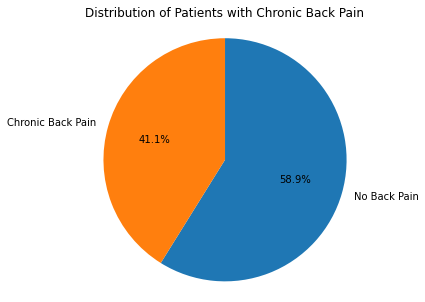

In [18]:
plt.figure(figsize = [16,5])
plt.title('Distribution of Patients with Chronic Back Pain')
back_pain_counts = regress_df.back_pain.value_counts()
back_pain_labels = ["No Back Pain", "Chronic Back Pain"]
plt.pie(back_pain_counts, labels=back_pain_labels, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.axis('square');

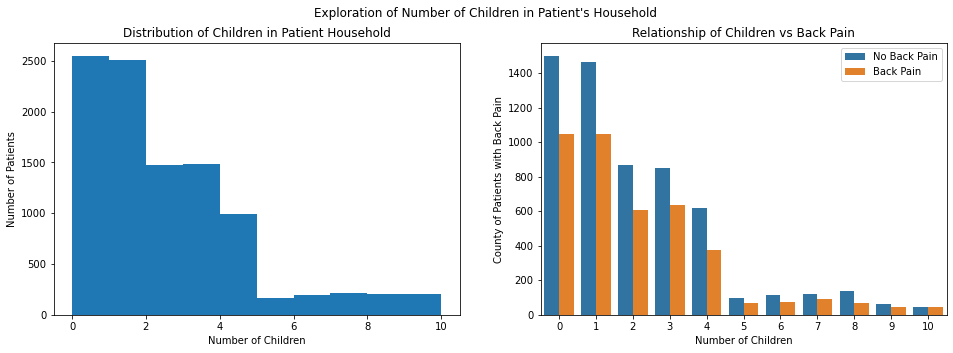

In [19]:
plt.figure(figsize = [16,5])
plt.suptitle("Exploration of Number of Children in Patient's Household")

# LEFT plot: Univariate exploration of num_children
plt.subplot(1, 2, 1)
plt.title('Distribution of Children in Patient Household')
bins = np.arange(0, regress_df.num_children.max() + 1, 1)
plt.hist(data=regress_df, x="num_children", bins=bins)
plt.xlabel('Number of Children')
plt.ylabel("Number of Patients");

# RIGHT plot: Bivariate exploration of num_children vs back_pain
plt.subplot(1, 2, 2)
plt.title("Relationship of Children vs Back Pain")
sns.countplot(data = regress_df, x="num_children", hue="back_pain")
plt.legend(["No Back Pain", "Back Pain"])
plt.xlabel("Number of Children")
plt.ylabel("County of Patients with Back Pain");

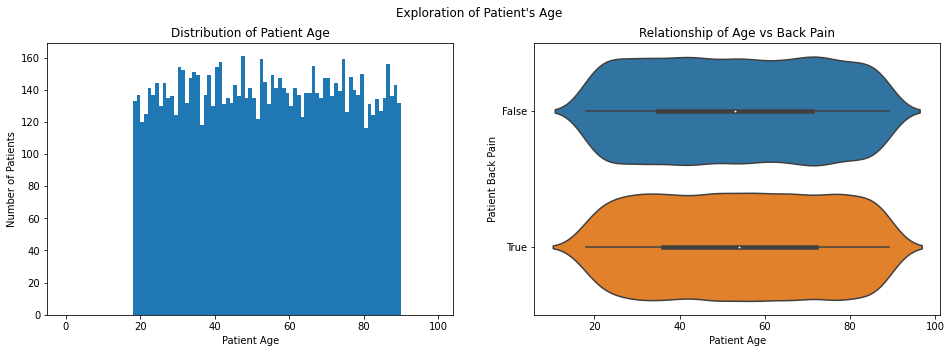

In [20]:
plt.figure(figsize = [16,5])
plt.suptitle("Exploration of Patient's Age")

# LEFT plot: Univariate exploration of age
plt.subplot(1, 2, 1)
plt.title('Distribution of Patient Age')
bins = np.arange(0, 100, 1)
plt.hist(data=regress_df, x="age", bins=bins)
plt.xlabel('Patient Age')
plt.ylabel("Number of Patients");

# RIGHT plot: Bivariate exploration of age vs back_pain
plt.subplot(1, 2, 2)
plt.title("Relationship of Age vs Back Pain")
sns.violinplot(data = regress_df, x="age", y="back_pain", orient='h')
plt.xlabel("Patient Age")
plt.ylabel("Patient Back Pain")
plt.yticks([0,1], ["False", "True"]);

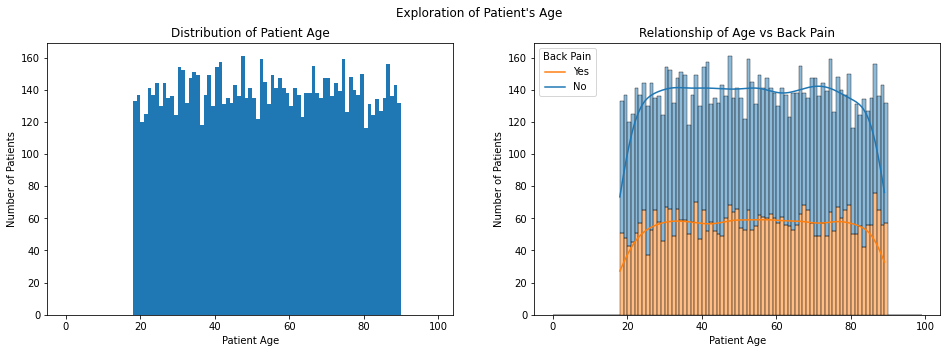

In [21]:
plt.figure(figsize = [16,5])
plt.suptitle("Exploration of Patient's Age")

# LEFT plot: Univariate exploration of age
plt.subplot(1, 2, 1)
plt.title('Distribution of Patient Age')
bins = np.arange(0, 100, 1)
plt.hist(data=regress_df, x="age", bins=bins)
plt.xlabel('Patient Age')
plt.ylabel("Number of Patients");

# RIGHT plot: Bivariate exploration of age vs back_pain
plt.subplot(1, 2, 2)
plt.title("Relationship of Age vs Back Pain")
sns.histplot(data = regress_df, x="age", hue="back_pain", bins=bins, kde=True, multiple="stack")
plt.legend(title="Back Pain", labels=["Yes", "No"])
plt.xlabel("Patient Age")
plt.ylabel("Number of Patients");

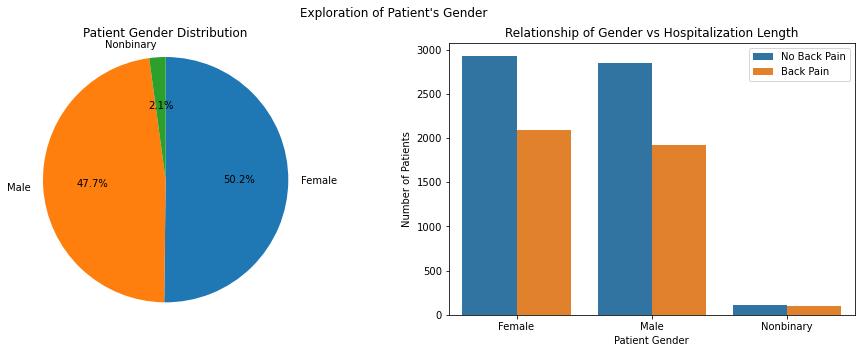

In [22]:
plt.figure(figsize = [16,5])
plt.suptitle("Exploration of Patient's Gender")

# LEFT plot: Univariate exploration of num_children
plt.subplot(1, 2, 1)
plt.title("Patient Gender Distribution")
gender_counts = df["Gender"].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

# RIGHT plot: Bivariate exploration of num_children vs back_pain
plt.subplot(1, 2, 2)
plt.title("Relationship of Gender vs Hospitalization Length")
sns.countplot(data = df, x="Gender", hue="BackPain")
plt.legend(["No Back Pain", "Back Pain"])
plt.xlabel("Patient Gender")
plt.ylabel("Number of Patients");

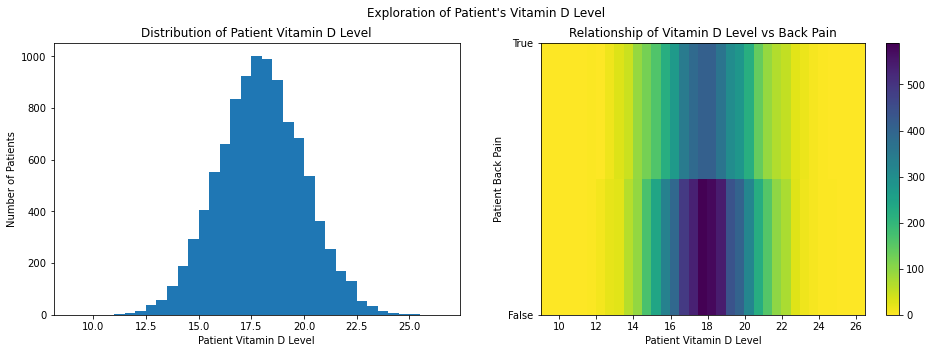

In [23]:
plt.figure(figsize = [16,5])
plt.suptitle("Exploration of Patient's Vitamin D Level")

# LEFT plot: Univariate exploration of vit_d_level
plt.subplot(1, 2, 1)
plt.title('Distribution of Patient Vitamin D Level')
bins = np.arange(9, 27, 0.5)
plt.hist(data=regress_df, x="vit_d_level", bins=bins)
plt.xlabel('Patient Vitamin D Level')
plt.ylabel("Number of Patients");

# RIGHT plot: Bivariate exploration of vit_d_level vs back_pain
plt.subplot(1, 2, 2)
plt.title("Relationship of Vitamin D Level vs Back Pain")
bins_y = np.arange(0, 1.25, 0.5)
plt.hist2d(data= regress_df, x="vit_d_level", y="back_pain", bins=[bins, bins_y], cmap= "viridis_r")
plt.colorbar()
plt.xlabel("Patient Vitamin D Level")
plt.ylabel("Patient Back Pain")
plt.yticks([0,1], ["False", "True"]);

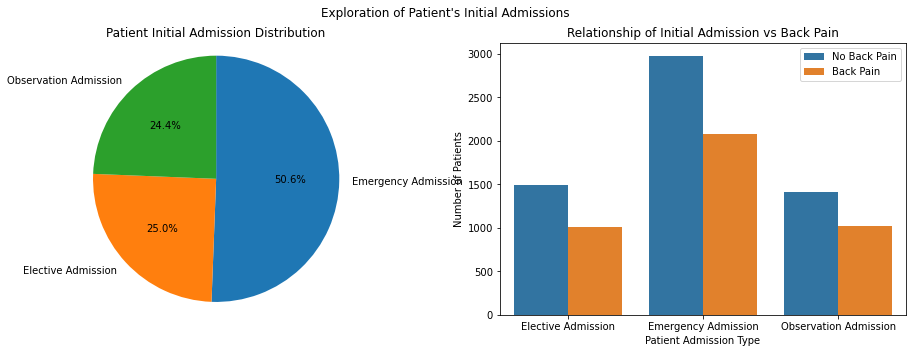

In [24]:
plt.figure(figsize = [16,5])
plt.suptitle("Exploration of Patient's Initial Admissions")

# LEFT plot: Univariate exploration of initial_admin
plt.subplot(1, 2, 1)
plt.title("Patient Initial Admission Distribution")
init_admit_counts = df["Initial_admin"].value_counts()
plt.pie(init_admit_counts, labels=init_admit_counts.index, autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

# RIGHT plot: Bivariate exploration of Initial_admin vs back_pain
plt.subplot(1, 2, 2)
plt.title("Relationship of Initial Admission vs Back Pain")
sns.countplot(data = df, x="Initial_admin", hue="BackPain")
plt.legend(["No Back Pain", "Back Pain"])
plt.xlabel("Patient Admission Type")
plt.ylabel("Number of Patients");

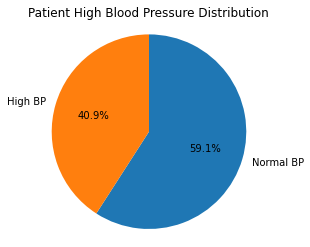

In [25]:
# TOP plot: Univariate exploration of high bp
plt.title("Patient High Blood Pressure Distribution")
high_bp_counts = df["HighBlood"].value_counts()
plt.pie(high_bp_counts, labels=["Normal BP", "High BP"], autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

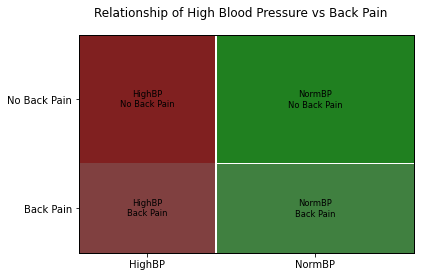

In [26]:
# BOTTOM plot: Bivariate exploration of high bp vs back_pain
temp_df = df[["HighBlood", "BackPain"]].copy()
high_bp_map = {1 : "HighBP", 0: "NormBP"}
back_pain_map = {1 : "Back Pain", 0: "No Back Pain"}
temp_df["HighBlood"] = temp_df["HighBlood"].map(high_bp_map)
temp_df["BackPain"] = temp_df["BackPain"].map(back_pain_map)
mosaic(temp_df, ["HighBlood", "BackPain"])
plt.suptitle("Relationship of High Blood Pressure vs Back Pain");

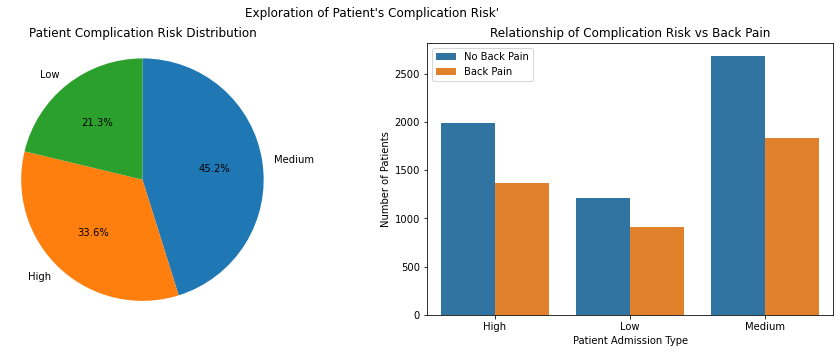

In [27]:
plt.figure(figsize = [16,5])
plt.suptitle("Exploration of Patient's Complication Risk'")

# LEFT plot: Univariate exploration of complication_risk
plt.subplot(1, 2, 1)
plt.title("Patient Complication Risk Distribution")
comp_risk_counts = df["Complication_risk"].value_counts()
comp_risk_labels = ["Medium", "High", "Low"]
plt.pie(comp_risk_counts, labels=comp_risk_counts.index, autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

# RIGHT plot: Bivariate exploration of complication_risk vs back_pain
plt.subplot(1, 2, 2)
plt.title("Relationship of Complication Risk vs Back Pain")
sns.countplot(data = df, x="Complication_risk", hue="BackPain")
plt.legend(["No Back Pain", "Back Pain"])
plt.xlabel("Patient Admission Type")
plt.ylabel("Number of Patients");

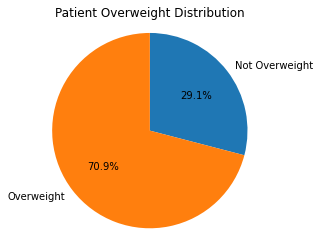

In [28]:
# TOP plot: Univariate exploration of overweight
plt.title("Patient Overweight Distribution")
overweight_counts = df["Overweight"].value_counts().sort_index()
plt.pie(overweight_counts, labels=["Not Overweight", "Overweight"], autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

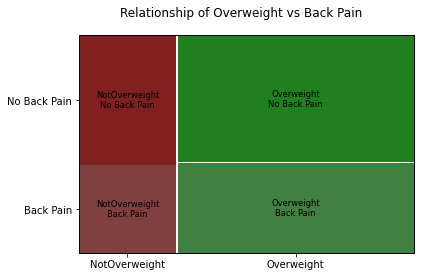

In [29]:
# BOTTOM plot: Bivariate exploration of overweight vs back_pain
temp_df = df[["Overweight", "BackPain"]].copy()
overweight_map = {1 : "Overweight", 0: "NotOverweight"}
back_pain_map = {1 : "Back Pain", 0: "No Back Pain"}
temp_df["Overweight"] = temp_df["Overweight"].map(overweight_map)
temp_df["BackPain"] = temp_df["BackPain"].map(back_pain_map)
mosaic(temp_df, ["Overweight", "BackPain"])
plt.suptitle("Relationship of Overweight vs Back Pain");

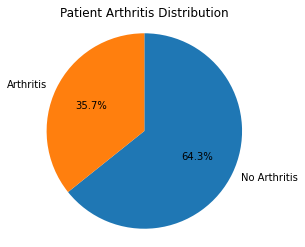

In [30]:
# TOP plot: Univariate exploration of arthritis
plt.title("Patient Arthritis Distribution")
arthritis_counts = df["Arthritis"].value_counts().sort_index()
plt.pie(arthritis_counts, labels=["No Arthritis", "Arthritis"], autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

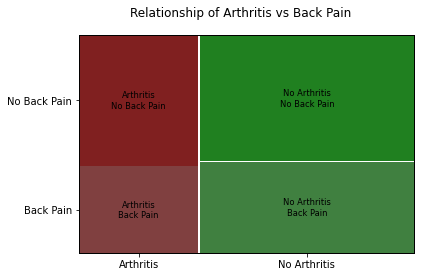

In [31]:
# BOTTOM plot: Bivariate exploration of arthritis vs back_pain
temp_df = df[["Arthritis", "BackPain"]].copy()
arthritis_map = {1 : "Arthritis", 0: "No Arthritis"}
back_pain_map = {1 : "Back Pain", 0: "No Back Pain"}
temp_df["Arthritis"] = temp_df["Arthritis"].map(arthritis_map)
temp_df["BackPain"] = temp_df["BackPain"].map(back_pain_map)
mosaic(temp_df, ["Arthritis", "BackPain"])
plt.suptitle("Relationship of Arthritis vs Back Pain");

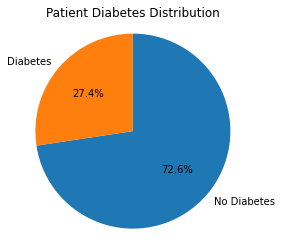

In [32]:
# TOP plot: Univariate exploration of diabetes
plt.title("Patient Diabetes Distribution")
diabetes_counts = df["Diabetes"].value_counts().sort_index()
plt.pie(diabetes_counts, labels=["No Diabetes", "Diabetes"], autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

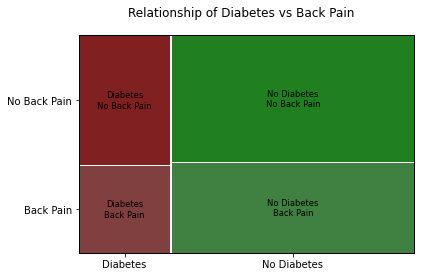

In [33]:
# BOTTOM plot: Bivariate exploration of diabetes vs back_pain
temp_df = df[["Diabetes", "BackPain"]].copy()
diabetes_map = {1 : "Diabetes", 0: "No Diabetes"}
back_pain_map = {1 : "Back Pain", 0: "No Back Pain"}
temp_df["Diabetes"] = temp_df["Diabetes"].map(diabetes_map)
temp_df["BackPain"] = temp_df["BackPain"].map(back_pain_map)
mosaic(temp_df, ["Diabetes", "BackPain"])
plt.suptitle("Relationship of Diabetes vs Back Pain");

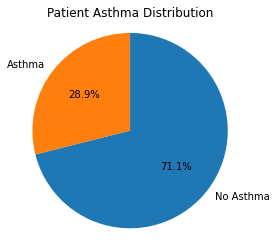

In [34]:
# TOP plot: Univariate exploration of asthma
plt.title("Patient Asthma Distribution")
asthma_counts = df["Asthma"].value_counts()
plt.pie(asthma_counts, labels=["No Asthma", "Asthma"], autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

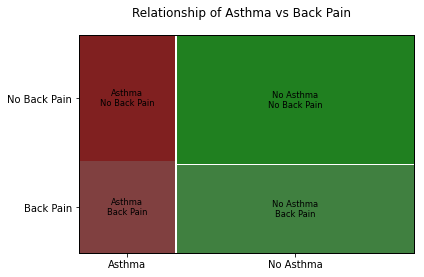

In [35]:
# BOTTOM plot: Bivariate exploration of asthma vs back_pain
temp_df = df[["Asthma", "BackPain"]].copy()
asthma_map = {1 : "Asthma", 0: "No Asthma"}
back_pain_map = {1 : "Back Pain", 0: "No Back Pain"}
temp_df["Asthma"] = temp_df["Asthma"].map(asthma_map)
temp_df["BackPain"] = temp_df["BackPain"].map(back_pain_map)
mosaic(temp_df, ["Asthma", "BackPain"])
plt.suptitle("Relationship of Asthma vs Back Pain");

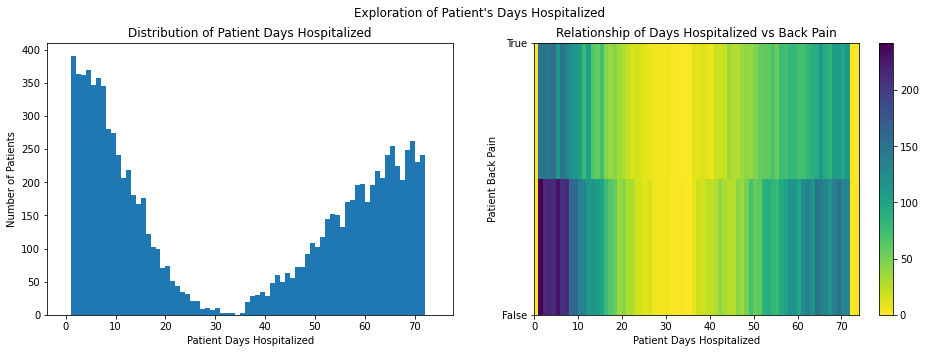

In [36]:
plt.figure(figsize = [16,5])
plt.suptitle("Exploration of Patient's Days Hospitalized")

# LEFT plot: Univariate exploration of days_hospitalized
plt.subplot(1, 2, 1)
plt.title('Distribution of Patient Days Hospitalized')
bins = np.arange(0, 75, 1)
plt.hist(data=regress_df, x="days_hospitalized", bins=bins)
plt.xlabel('Patient Days Hospitalized')
plt.ylabel("Number of Patients");

# RIGHT plot: Bivariate exploration of days_hospitalized vs back_pain
plt.subplot(1, 2, 2)
plt.title("Relationship of Days Hospitalized vs Back Pain")
bins_y = np.arange(0, 1.25, 0.5)
plt.hist2d(data= regress_df, x="days_hospitalized", y="back_pain", bins=[bins, bins_y], cmap= "viridis_r")
plt.colorbar()
plt.xlabel("Patient Days Hospitalized")
plt.ylabel("Patient Back Pain")
plt.yticks([0,1], ["False", "True"]);

<a id="#PartC5"></a>
## C5: Copy of Prepared Data Set

A copy of the prepared dataset is submitted alongside this analysis. The full cleaned dataframe can be found in full_clean.csv, while the reduced dataframe, containing only the variables I want to analyze (including dummies for the categorical columns) is in red_clean.csv. I've submitted both, as the rubric wasn't really clear on which it would be interested in, and my first PA for this class did not clarify the matter.  

In [37]:
# Save dataframe to CSV, ignore index (if included, this will create an additional unnecessary column)
df.to_csv('task2_full_clean.csv', index=False)

# Save dataframe to CSV, ignore index (if included, this will create an additional unnecessary column)
regress_df.to_csv('task2_red_clean.csv', index=False)

<a id="#PartD1"></a>
## D1: Initial Logistic Regression Model

My goal in generating the initial logistic regression model is to include all of the explanatory variables that I highlighted earlier, and I can start eliminating them later on as I reduce the model. However, I immediately encountered an issue in that my attempt at generating a logistic regression model would fail due to perfect collinearity among some variables in the dataset [(Stack Overflow: logistic regression failure in statsmodel, 2019)](https://stats.stackexchange.com/questions/463324/logistic-regression-failed-in-statsmodel-but-works-in-sklearn-breast-cancer-dat) which would lead to a failure in the statsmodel `Logit()` function. So before I generate the Initial Logistic Regression Model, I have to eliminate any variable causing this issue, by checking the Variance Inflaction Factor (VIF). 

In [38]:
# Warning exists for multicolinearity - check for VIF to see if variables should be eliminated due to high multicolinearity
X = regress_df[["num_children", "age", "gender_male", "gender_nonbinary", "vit_d_level", "initial_admit_observ", "initial_admit_emerg", "high_bp", "comp_risk_low", "comp_risk_medium", "overweight", "arthritis", "diabetes", "asthma", "days_hospitalized"]]

vif_df = pd.DataFrame()
vif_df["feature"] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_df)

C:\Users\hasek\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                 feature        VIF
0           num_children   1.929123
1                    age   7.239627
2            gender_male        inf
3       gender_nonbinary        inf
4            vit_d_level  16.747647
5   initial_admit_observ   1.936484
6    initial_admit_emerg   2.958501
7                high_bp   1.685910
8          comp_risk_low   1.615803
9       comp_risk_medium   2.315867
10            overweight   3.370225
11             arthritis   1.551462
12              diabetes   1.369961
13                asthma   1.404353
14     days_hospitalized   2.674516


We can see that this indicates a perfect collinearity between gender_male and gender_nonbinary, indicated by the measurement of their collinearity coming back as "infinite". Removing one will let us continue, so I will remove gender_nonbinary, as the smaller of the two. I will address additional multicollinearity issues as we reduce the dataset from the initial model.  

I've constructed an initial logistic regression model below, including all of the predictor values identified in section C2 (except for gender_nonbinary, which we just eliminated). This code was generated with assistance from [Susan Li's Logistic Regression in Python Tutorial in Towards Data Science, 2017](https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8). This initial logistic regression model will be reduced to remove any observed issue sand focus only on variables which contribute meaningfully to the explanatory variable. 

In [39]:
y = regress_df.back_pain
X = regress_df[["num_children", "age", "gender_male", "vit_d_level", "initial_admit_observ", "initial_admit_emerg", "high_bp", "comp_risk_low", "comp_risk_medium", "overweight", "arthritis", "diabetes", "asthma", "days_hospitalized"]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.676099
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              back_pain   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9985
Method:                           MLE   Df Model:                           14
Date:                Mon, 28 Nov 2022   Pseudo R-squ.:                0.001868
Time:                        20:13:54   Log-Likelihood:                -6761.0
converged:                       True   LL-Null:                       -6773.6
Covariance Type:            nonrobust   LLR p-value:                   0.03167
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
num_children            -0.0074      0.009     -0.781      0.435      -0.026       0.011

<a id="#PartD2"></a>
## D2: Reduction Justification

In reducing the logistic regression model from all of the collected explanatory variables, a good place to start is with eliminating any variables that have significant multicollinearity with each other, as this is a required assumption of any logistic regression analysis. I already eliminated gender_nonbinary because its multicollinearity was so high that it actually broke the logistic regression model, but we can use the same process of checking the Variance Inflation Factor (VIF) to check for other variables that need to be eliminated. 

In [40]:
# Check for VIF to see if variables should be eliminated due to high multicolinearity
X = regress_df[["num_children", "age", "gender_male", "vit_d_level", "initial_admit_observ", "initial_admit_emerg", "high_bp", "comp_risk_low", "comp_risk_medium", "overweight", "arthritis", "diabetes", "asthma", "days_hospitalized"]]

vif_df = pd.DataFrame()
vif_df["feature"] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_df)

                 feature        VIF
0           num_children   1.929123
1                    age   7.239627
2            gender_male   1.888921
3            vit_d_level  16.747647
4   initial_admit_observ   1.936484
5    initial_admit_emerg   2.958501
6                high_bp   1.685910
7          comp_risk_low   1.615803
8       comp_risk_medium   2.315867
9             overweight   3.370225
10             arthritis   1.551462
11              diabetes   1.369961
12                asthma   1.404353
13     days_hospitalized   2.674516


In [41]:
# Eliminated vit_d_level (VIF = 16.75), rerunning analysis to see if any VIF still above 10 
X = regress_df[["num_children", "age", "gender_male", "initial_admit_observ", "initial_admit_emerg", "high_bp", "comp_risk_low", "comp_risk_medium", "overweight", "arthritis", "diabetes", "asthma", "days_hospitalized"]]

vif_df = pd.DataFrame()
vif_df["feature"] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_df)

                 feature       VIF
0           num_children  1.862879
1                    age  5.185355
2            gender_male  1.815807
3   initial_admit_observ  1.781200
4    initial_admit_emerg  2.602939
5                high_bp  1.645824
6          comp_risk_low  1.549846
7       comp_risk_medium  2.172359
8             overweight  3.032522
9              arthritis  1.526370
10              diabetes  1.354580
11                asthma  1.384958
12     days_hospitalized  2.508330


Patient vit_d_level also had a very high VIF, so that variable was eliminated as well. The next process will be reducing the variables which are not statistically significant to the model, through Backwards Stepwise Elimination

This will be done by generating the logistic regression model and checking the p-values for each variable. I am interested in statistically significant variables, so I will use a threshold (alpha) of 0.10. Any p-value below this is considered statistically significant, while p-values above are not. The model will be generated, and the independent variable with the highest p-value will be eliminated. The model will then be generated again, and the process repeated until all p-values for included variables are below 0.10. 

NOTE: This process was going to initially seek values below an alpha of 0.05. However, I quickly found out that 1) this would eliminate all continuous variables, and 2) would eventually leave me with only a single categorical variable, though two other variables would be *just* over the 0.05 threshold. The rubric requires me to maintain a categorical and a continuous variable, so I decided to raise my alpha threshold to 0.10, in order to treat all of the variables consistently. This will impact the conclusions from this analysis, which will be addressed later, but it does work for reducing the logistic regression model. 

In [42]:
# BACKWARD ELIMINATION # 1: Seek highest p-value above 0.10 (eliminated gender_nonbinary, vit_d_levels due to multicolinearity)
y = regress_df.back_pain
X = regress_df[["num_children", "age", "gender_male", "initial_admit_observ", "initial_admit_emerg", "high_bp", "comp_risk_low", "comp_risk_medium", "overweight", "arthritis", "diabetes", "asthma", "days_hospitalized"]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.676146
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              back_pain   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9986
Method:                           MLE   Df Model:                           13
Date:                Mon, 28 Nov 2022   Pseudo R-squ.:                0.001798
Time:                        20:13:55   Log-Likelihood:                -6761.5
converged:                       True   LL-Null:                       -6773.6
Covariance Type:            nonrobust   LLR p-value:                   0.02804
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
num_children            -0.0075      0.009     -0.791      0.429      -0.026       0.011

In [43]:
# BACKWARD ELIMINATION # 2: Seek highest p-value above 0.10 (eliminated comp_risk_medium, p-value of 0.947)
y = regress_df.back_pain
X = regress_df[["num_children", "age", "gender_male", "initial_admit_observ", "initial_admit_emerg", "high_bp", "comp_risk_low", "overweight", "arthritis", "diabetes", "asthma", "days_hospitalized"]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.676147
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              back_pain   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9987
Method:                           MLE   Df Model:                           12
Date:                Mon, 28 Nov 2022   Pseudo R-squ.:                0.001797
Time:                        20:13:56   Log-Likelihood:                -6761.5
converged:                       True   LL-Null:                       -6773.6
Covariance Type:            nonrobust   LLR p-value:                   0.01824
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
num_children            -0.0075      0.009     -0.790      0.429      -0.026       0.011

In [44]:
# BACKWARD ELIMINATION # 3: Seek highest p-value above 0.10 (eliminated high_bp, p-value of 0.744)
y = regress_df.back_pain
X = regress_df[["num_children", "age", "gender_male", "initial_admit_observ", "initial_admit_emerg", "comp_risk_low", "overweight", "arthritis", "diabetes", "asthma", "days_hospitalized"]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.676152
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              back_pain   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9988
Method:                           MLE   Df Model:                           11
Date:                Mon, 28 Nov 2022   Pseudo R-squ.:                0.001789
Time:                        20:13:56   Log-Likelihood:                -6761.5
converged:                       True   LL-Null:                       -6773.6
Covariance Type:            nonrobust   LLR p-value:                   0.01176
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
num_children            -0.0074      0.009     -0.789      0.430      -0.026       0.011

In [45]:
# BACKWARD ELIMINATION # 4: Seek highest p-value above 0.10 (eliminated initial_admit_emerg, p-value of 0.451)
y = regress_df.back_pain
X = regress_df[["num_children", "age", "gender_male", "initial_admit_observ", "comp_risk_low", "overweight", "arthritis", "diabetes", "asthma", "days_hospitalized"]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.676180
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              back_pain   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9989
Method:                           MLE   Df Model:                           10
Date:                Mon, 28 Nov 2022   Pseudo R-squ.:                0.001747
Time:                        20:13:56   Log-Likelihood:                -6761.8
converged:                       True   LL-Null:                       -6773.6
Covariance Type:            nonrobust   LLR p-value:                  0.008516
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
num_children            -0.0074      0.009     -0.784      0.433      -0.026       0.011

In [46]:
# BACKWARD ELIMINATION # 5: Seek highest p-value above 0.10 (eliminated num_children, p-value of 0.433)
y = regress_df.back_pain
X = regress_df[["age", "gender_male", "initial_admit_observ", "comp_risk_low", "overweight", "arthritis", "diabetes", "asthma", "days_hospitalized"]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.676211
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              back_pain   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9990
Method:                           MLE   Df Model:                            9
Date:                Mon, 28 Nov 2022   Pseudo R-squ.:                0.001702
Time:                        20:13:57   Log-Likelihood:                -6762.1
converged:                       True   LL-Null:                       -6773.6
Covariance Type:            nonrobust   LLR p-value:                  0.006068
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
age                      0.0020      0.001      2.076      0.038       0.000       0.004

In [47]:
# BACKWARD ELIMINATION # 6: Seek highest p-value above 0.10 (eliminated initial_admit_observ, p-value of 0.332)
y = regress_df.back_pain
X = regress_df[["age", "gender_male", "comp_risk_low", "overweight", "arthritis", "diabetes", "asthma", "days_hospitalized"]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.676258
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              back_pain   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9991
Method:                           MLE   Df Model:                            8
Date:                Mon, 28 Nov 2022   Pseudo R-squ.:                0.001633
Time:                        20:13:57   Log-Likelihood:                -6762.6
converged:                       True   LL-Null:                       -6773.6
Covariance Type:            nonrobust   LLR p-value:                  0.004702
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
age                   0.0020      0.001      2.067      0.039       0.000       0.004
gender_m

In [48]:
# BACKWARD ELIMINATION # 7: Seek highest p-value above 0.10 (eliminated overweight, p-value of 0.300)
y = regress_df.back_pain
X = regress_df[["age", "gender_male", "comp_risk_low", "arthritis", "diabetes", "asthma", "days_hospitalized"]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.676312
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              back_pain   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9992
Method:                           MLE   Df Model:                            7
Date:                Mon, 28 Nov 2022   Pseudo R-squ.:                0.001553
Time:                        20:13:57   Log-Likelihood:                -6763.1
converged:                       True   LL-Null:                       -6773.6
Covariance Type:            nonrobust   LLR p-value:                  0.003711
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
age                   0.0020      0.001      2.059      0.040    9.76e-05       0.004
gender_m

In [49]:
# BACKWARD ELIMINATION # 8: Seek highest p-value above 0.10 (eliminated diabetes, p-value of 0.172)
y = regress_df.back_pain
X = regress_df[["age", "gender_male", "comp_risk_low", "arthritis", "asthma", "days_hospitalized"]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.676406
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              back_pain   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9993
Method:                           MLE   Df Model:                            6
Date:                Mon, 28 Nov 2022   Pseudo R-squ.:                0.001415
Time:                        20:13:58   Log-Likelihood:                -6764.1
converged:                       True   LL-Null:                       -6773.6
Covariance Type:            nonrobust   LLR p-value:                  0.003887
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
age                   0.0020      0.001      2.054      0.040     9.3e-05       0.004
gender_m

In [50]:
# BACKWARD ELIMINATION # 9: Seek highest p-value above 0.10 (eliminated asthma, p-value of 0.156)
y = regress_df.back_pain
X = regress_df[["age", "gender_male", "comp_risk_low", "arthritis", "days_hospitalized"]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.676506
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              back_pain   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9994
Method:                           MLE   Df Model:                            5
Date:                Mon, 28 Nov 2022   Pseudo R-squ.:                0.001267
Time:                        20:13:58   Log-Likelihood:                -6765.1
converged:                       True   LL-Null:                       -6773.6
Covariance Type:            nonrobust   LLR p-value:                  0.004210
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
age                   0.0020      0.001      2.067      0.039       0.000       0.004
gender_m

In [51]:
# BACKWARD ELIMINATION # 10: Seek highest p-value above 0.10 (eliminated gender_male, p-value of 0.128)
y = regress_df.back_pain
X = regress_df[["age", "comp_risk_low", "arthritis", "days_hospitalized"]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.676622
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              back_pain   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9995
Method:                           MLE   Df Model:                            4
Date:                Mon, 28 Nov 2022   Pseudo R-squ.:                0.001096
Time:                        20:13:59   Log-Likelihood:                -6766.2
converged:                       True   LL-Null:                       -6773.6
Covariance Type:            nonrobust   LLR p-value:                  0.005042
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
age                   0.0021      0.001      2.092      0.036       0.000       0.004
comp_ris

This model ends up being the final logistic regression model, because every variable has a p-value less than the alpha threshold that was previously set of 0.10. We can also compare this model to the initial model to verify if it is an improvement by checking the LLR p-value. The initial model had a LLR p-value of 0.03167, which is a sufficiently low p-value to tell us that the model is useful. However, the reduced logistic regression model, even using variables with a slightly higher p-value than I'd originally intended, has an even lower p-value, at 0.005042. This improvement indicates that the reduced model is more effective than the initial model. 

<a id="#PartD3"></a>
## D3: Reduced Logistic Regression Model

The variables for gender_nonbinary and vit_d_levels were eliminated due to multicollinearity, while the variables for num_children, gender_male, initial_admit_emerg, initial_admit_observ, high_bp, comp_risk_medium, overweight, diabetes, and asthma were all eliminated for poor p-values. 

The variables remaining in the model and having the most impact on the dependent (y) variable of back pain are: 
- age
- complication risk (low)
- arthritis
- days hospitalized

These variables are seen in the final reduced logistic regression model, which has an improved (reduced) LLR p-value compared to the initial model: 

In [52]:
# All p-values for independent variables are < 0.10, this is the final reduced model
y = regress_df.back_pain
X = regress_df[["age", "comp_risk_low", "arthritis", "days_hospitalized"]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.676622
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              back_pain   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9995
Method:                           MLE   Df Model:                            4
Date:                Mon, 28 Nov 2022   Pseudo R-squ.:                0.001096
Time:                        20:13:59   Log-Likelihood:                -6766.2
converged:                       True   LL-Null:                       -6773.6
Covariance Type:            nonrobust   LLR p-value:                  0.005042
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
age                   0.0021      0.001      2.092      0.036       0.000       0.004
comp_ris

<a id="#PartE1"></a>
## E1: Analysis of Logistic Regression Models

The initial logistic regression model had a lot of variables in it, not all of which were particularly important to the model itself. Two variables were removed due to multicolinearity concerns, vit_d_levels and gender_nonbinary. After those two were eliminated, other variables were removed from the initial model through a process of Backwards Stepwise Elimination based on the p-value of each remaining variable. The p-value of a variable indicates if it is statistically significant or not, with lower values being more significant. If a variable isn't statistically significant, then it doesn't need to be kept in the model. Eliminating the variable with the highest (worst) p-value can change how other variables interact, so this has to be done one at a time, rerunning the model after each variable is eliminated. This was done until every variable remaining had a p-value less than 0.10, indicating that the variable was statistically significant. While a threshold of 0.05 would be preferable, this would've resulted in only saving the age variable, and the rubric for this project requires the use of both categorical and continuous variables, so I had to raise the threshold to 0.10. 

The initial model and the reduced model can be evaluated in their performance relative to each other by examining the LLR p-value for each. The LLR p-value is similar to p-values used in other statistical contexts, in that a lower p-value indicates a lower likelihood of a result being based on random chance and instead a relationship being present. The initial logistic regression model had a LLR P-value of 0.03167. This p-value is low enough (below 0.05) to indicate that it is a "useful" model in predicting the values of the response variable, despite having several explanatory variables that had high p-values, indicating that they did not have a relationship with the response variable. However, the reduced model eliminates these variables that lacks a clear relationship, leading to the reduce model's LLR p-value being 0.005042, which is markedly lower than the initial model's p-value. This improvement indicates that the reduced model is more effective than the initial model in predicting the response variable's values, and this makes intuitive sense because we got rid of unnecessary or irrelevant variables. 

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
final_matrix = confusion_matrix(y_test, y_pred)
print(final_matrix)

Accuracy of logistic regression classifier on test set: 0.58
[[1739    0]
 [1261    0]]


This confusion matrix indicates that this logistic regression model has made 1739 correct predictions, and 1261 incorrect predictions. The matrix indicates that the model has only predicted that patients will not have back pain, but this is actually slightly misleading. I did some experimentation outside of what is presented here in trying to figure out why this is. I found that if the test_size is increased to a very large amount (above 0.8, from its present value of 0.3), that the model will begin to start predicting some observed patients as having back pain. Such a test size is not reasonable, so I have dialed it back to a traditional value, as seen here. The resulting behavior is thus a result of the data set and the limitations of the model, rather than any apparently problem with my code. 

<a id="#PartE2"></a>
## E2: Model Outputs 

This part of the rubric is confusing, as I've literally been asked to provide these outputs in sections D and E1, and again in E3. I will provide these outputs again in section E3, where I compile all of the required code *and* the outputs of each. 

<a id="#PartE3"></a>
## E3: Model Code

In [54]:
# Initial Logistic Regression Model
y = regress_df.back_pain
X = regress_df[["num_children", "age", "gender_male", "vit_d_level", "initial_admit_observ", "initial_admit_emerg", "high_bp", "comp_risk_low", "comp_risk_medium", "overweight", "arthritis", "diabetes", "asthma", "days_hospitalized"]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.676099
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              back_pain   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9985
Method:                           MLE   Df Model:                           14
Date:                Mon, 28 Nov 2022   Pseudo R-squ.:                0.001868
Time:                        20:14:00   Log-Likelihood:                -6761.0
converged:                       True   LL-Null:                       -6773.6
Covariance Type:            nonrobust   LLR p-value:                   0.03167
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
num_children            -0.0074      0.009     -0.781      0.435      -0.026       0.011

In [55]:
# Check for VIF to see if variables should be eliminated due to high multicolinearity
X = regress_df[["num_children", "age", "gender_male", "vit_d_level", "initial_admit_observ", "initial_admit_emerg", "high_bp", "comp_risk_low", "comp_risk_medium", "overweight", "arthritis", "diabetes", "asthma", "days_hospitalized"]]

vif_df = pd.DataFrame()
vif_df["feature"] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_df)

                 feature        VIF
0           num_children   1.929123
1                    age   7.239627
2            gender_male   1.888921
3            vit_d_level  16.747647
4   initial_admit_observ   1.936484
5    initial_admit_emerg   2.958501
6                high_bp   1.685910
7          comp_risk_low   1.615803
8       comp_risk_medium   2.315867
9             overweight   3.370225
10             arthritis   1.551462
11              diabetes   1.369961
12                asthma   1.404353
13     days_hospitalized   2.674516


In [56]:
# Eliminated vit_d_level (VIF = 16.75), rerunning analysis to see if any VIF still above 10 
X = regress_df[["num_children", "age", "gender_male", "initial_admit_observ", "initial_admit_emerg", "high_bp", "comp_risk_low", "comp_risk_medium", "overweight", "arthritis", "diabetes", "asthma", "days_hospitalized"]]

vif_df = pd.DataFrame()
vif_df["feature"] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_df)

                 feature       VIF
0           num_children  1.862879
1                    age  5.185355
2            gender_male  1.815807
3   initial_admit_observ  1.781200
4    initial_admit_emerg  2.602939
5                high_bp  1.645824
6          comp_risk_low  1.549846
7       comp_risk_medium  2.172359
8             overweight  3.032522
9              arthritis  1.526370
10              diabetes  1.354580
11                asthma  1.384958
12     days_hospitalized  2.508330


In [57]:
# BACKWARD ELIMINATION # 1: Seek highest p-value above 0.10 (eliminated gender_nonbinary, vit_d_levels due to multicolinearity)
y = regress_df.back_pain
X = regress_df[["num_children", "age", "gender_male", "initial_admit_observ", "initial_admit_emerg", "high_bp", "comp_risk_low", "comp_risk_medium", "overweight", "arthritis", "diabetes", "asthma", "days_hospitalized"]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.676146
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              back_pain   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9986
Method:                           MLE   Df Model:                           13
Date:                Mon, 28 Nov 2022   Pseudo R-squ.:                0.001798
Time:                        20:14:03   Log-Likelihood:                -6761.5
converged:                       True   LL-Null:                       -6773.6
Covariance Type:            nonrobust   LLR p-value:                   0.02804
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
num_children            -0.0075      0.009     -0.791      0.429      -0.026       0.011

In [58]:
# BACKWARD ELIMINATION # 2: Seek highest p-value above 0.10 (eliminated comp_risk_medium, p-value of 0.947)
y = regress_df.back_pain
X = regress_df[["num_children", "age", "gender_male", "initial_admit_observ", "initial_admit_emerg", "high_bp", "comp_risk_low", "overweight", "arthritis", "diabetes", "asthma", "days_hospitalized"]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.676147
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              back_pain   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9987
Method:                           MLE   Df Model:                           12
Date:                Mon, 28 Nov 2022   Pseudo R-squ.:                0.001797
Time:                        20:14:03   Log-Likelihood:                -6761.5
converged:                       True   LL-Null:                       -6773.6
Covariance Type:            nonrobust   LLR p-value:                   0.01824
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
num_children            -0.0075      0.009     -0.790      0.429      -0.026       0.011

In [59]:
# BACKWARD ELIMINATION # 3: Seek highest p-value above 0.10 (eliminated high_bp, p-value of 0.744)
y = regress_df.back_pain
X = regress_df[["num_children", "age", "gender_male", "initial_admit_observ", "initial_admit_emerg", "comp_risk_low", "overweight", "arthritis", "diabetes", "asthma", "days_hospitalized"]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.676152
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              back_pain   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9988
Method:                           MLE   Df Model:                           11
Date:                Mon, 28 Nov 2022   Pseudo R-squ.:                0.001789
Time:                        20:14:03   Log-Likelihood:                -6761.5
converged:                       True   LL-Null:                       -6773.6
Covariance Type:            nonrobust   LLR p-value:                   0.01176
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
num_children            -0.0074      0.009     -0.789      0.430      -0.026       0.011

In [60]:
# BACKWARD ELIMINATION # 4: Seek highest p-value above 0.10 (eliminated initial_admit_emerg, p-value of 0.451)
y = regress_df.back_pain
X = regress_df[["num_children", "age", "gender_male", "initial_admit_observ", "comp_risk_low", "overweight", "arthritis", "diabetes", "asthma", "days_hospitalized"]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.676180
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              back_pain   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9989
Method:                           MLE   Df Model:                           10
Date:                Mon, 28 Nov 2022   Pseudo R-squ.:                0.001747
Time:                        20:14:04   Log-Likelihood:                -6761.8
converged:                       True   LL-Null:                       -6773.6
Covariance Type:            nonrobust   LLR p-value:                  0.008516
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
num_children            -0.0074      0.009     -0.784      0.433      -0.026       0.011

In [61]:
# BACKWARD ELIMINATION # 5: Seek highest p-value above 0.10 (eliminated num_children, p-value of 0.433)
y = regress_df.back_pain
X = regress_df[["age", "gender_male", "initial_admit_observ", "comp_risk_low", "overweight", "arthritis", "diabetes", "asthma", "days_hospitalized"]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.676211
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              back_pain   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9990
Method:                           MLE   Df Model:                            9
Date:                Mon, 28 Nov 2022   Pseudo R-squ.:                0.001702
Time:                        20:14:04   Log-Likelihood:                -6762.1
converged:                       True   LL-Null:                       -6773.6
Covariance Type:            nonrobust   LLR p-value:                  0.006068
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
age                      0.0020      0.001      2.076      0.038       0.000       0.004

In [62]:
# BACKWARD ELIMINATION # 6: Seek highest p-value above 0.10 (eliminated initial_admit_observ, p-value of 0.332)
y = regress_df.back_pain
X = regress_df[["age", "gender_male", "comp_risk_low", "overweight", "arthritis", "diabetes", "asthma", "days_hospitalized"]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.676258
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              back_pain   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9991
Method:                           MLE   Df Model:                            8
Date:                Mon, 28 Nov 2022   Pseudo R-squ.:                0.001633
Time:                        20:14:04   Log-Likelihood:                -6762.6
converged:                       True   LL-Null:                       -6773.6
Covariance Type:            nonrobust   LLR p-value:                  0.004702
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
age                   0.0020      0.001      2.067      0.039       0.000       0.004
gender_m

In [63]:
# BACKWARD ELIMINATION # 7: Seek highest p-value above 0.10 (eliminated overweight, p-value of 0.300)
y = regress_df.back_pain
X = regress_df[["age", "gender_male", "comp_risk_low", "arthritis", "diabetes", "asthma", "days_hospitalized"]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.676312
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              back_pain   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9992
Method:                           MLE   Df Model:                            7
Date:                Mon, 28 Nov 2022   Pseudo R-squ.:                0.001553
Time:                        20:14:04   Log-Likelihood:                -6763.1
converged:                       True   LL-Null:                       -6773.6
Covariance Type:            nonrobust   LLR p-value:                  0.003711
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
age                   0.0020      0.001      2.059      0.040    9.76e-05       0.004
gender_m

In [64]:
# BACKWARD ELIMINATION # 8: Seek highest p-value above 0.10 (eliminated diabetes, p-value of 0.172)
y = regress_df.back_pain
X = regress_df[["age", "gender_male", "comp_risk_low", "arthritis", "asthma", "days_hospitalized"]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.676406
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              back_pain   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9993
Method:                           MLE   Df Model:                            6
Date:                Mon, 28 Nov 2022   Pseudo R-squ.:                0.001415
Time:                        20:14:05   Log-Likelihood:                -6764.1
converged:                       True   LL-Null:                       -6773.6
Covariance Type:            nonrobust   LLR p-value:                  0.003887
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
age                   0.0020      0.001      2.054      0.040     9.3e-05       0.004
gender_m

In [65]:
# BACKWARD ELIMINATION # 9: Seek highest p-value above 0.10 (eliminated asthma, p-value of 0.156)
y = regress_df.back_pain
X = regress_df[["age", "gender_male", "comp_risk_low", "arthritis", "days_hospitalized"]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.676506
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              back_pain   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9994
Method:                           MLE   Df Model:                            5
Date:                Mon, 28 Nov 2022   Pseudo R-squ.:                0.001267
Time:                        20:14:05   Log-Likelihood:                -6765.1
converged:                       True   LL-Null:                       -6773.6
Covariance Type:            nonrobust   LLR p-value:                  0.004210
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
age                   0.0020      0.001      2.067      0.039       0.000       0.004
gender_m

In [66]:
# BACKWARD ELIMINATION # 10: Seek highest p-value above 0.10 (eliminated gender_male, p-value of 0.128)
y = regress_df.back_pain
X = regress_df[["age", "comp_risk_low", "arthritis", "days_hospitalized"]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.676622
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              back_pain   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9995
Method:                           MLE   Df Model:                            4
Date:                Mon, 28 Nov 2022   Pseudo R-squ.:                0.001096
Time:                        20:14:05   Log-Likelihood:                -6766.2
converged:                       True   LL-Null:                       -6773.6
Covariance Type:            nonrobust   LLR p-value:                  0.005042
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
age                   0.0021      0.001      2.092      0.036       0.000       0.004
comp_ris

In [67]:
# All p-values for independent variables are < 0.10, this is the final reduced model
y = regress_df.back_pain
X = regress_df[["age", "comp_risk_low", "arthritis", "days_hospitalized"]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.676622
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              back_pain   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9995
Method:                           MLE   Df Model:                            4
Date:                Mon, 28 Nov 2022   Pseudo R-squ.:                0.001096
Time:                        20:14:05   Log-Likelihood:                -6766.2
converged:                       True   LL-Null:                       -6773.6
Covariance Type:            nonrobust   LLR p-value:                  0.005042
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
age                   0.0021      0.001      2.092      0.036       0.000       0.004
comp_ris

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
final_matrix = confusion_matrix(y_test, y_pred)
print(final_matrix)

Accuracy of logistic regression classifier on test set: 0.58
[[1739    0]
 [1261    0]]


In [69]:
result.params

age                  0.002062
comp_risk_low        0.096356
arthritis           -0.082235
days_hospitalized    0.001315
const               -0.505474
dtype: float64

In [70]:
# Calculate odds ratios for each coefficient, for the purposes of satisfying F1's requirements
print(f"The odds ratio for age is {round(np.exp(0.002062), 4)}. Given this, the change in odds for back pain is {round((np.exp(0.002062) - 1) * 100, 4)}")
print(f"The odds ratio for complication risk - low is {round(np.exp(0.096356), 4)}. Given this, the change in odds for back pain is {round((np.exp(0.096356) - 1) * 100, 4)}")
print(f"The odds ratio for arthritis is {round(np.exp(0.082235), 4)}. Given this, the change in odds for back pain is {round((np.exp(0.082235) - 1) * 100, 4)}")
print(f"The odds ratio for days hospitalized is {round(np.exp(0.001315), 4)}. Given this, the change in odds for back pain is {round((np.exp(0.001315) - 1) * 100, 4)}")

The odds ratio for age is 1.0021. Given this, the change in odds for back pain is 0.2064
The odds ratio for complication risk - low is 1.1012. Given this, the change in odds for back pain is 10.1151
The odds ratio for arthritis is 1.0857. Given this, the change in odds for back pain is 8.5711
The odds ratio for days hospitalized is 1.0013. Given this, the change in odds for back pain is 0.1316


<a id="#PartF1"></a>
## F1: Results of Data Analysis

The logistic regression analysis yields the following equation for the reduced model:

$$
ln\frac{\hat{p}}{(1-\hat{p})} = -0.5055 + 0.0021(patient\hspace{1mm}age) + 0.0964(low\hspace{1mm}complication\hspace{1mm}risk) - 0.0822(arthritis) - 0.0013(days\hspace{1mm}hospitalized)
$$

This can be used to conclude the following about each explanatory variable, by first calculating the odds ratio [as demonstrated by Darryl MacKenzie of Proteus](https://www.youtube.com/watch?v=RDY5MFVbRQE), and then using that odds ratio to calculate the change in odds as [demonstrated here by Zach of Statology](https://www.statology.org/interpret-odds-ratio-less-than-1/):
- Keeping all things constant, for one unit increase in patient age, the odds of a patient having chronic back pain *increase* by 0.2064%. 
- Keeping all things constant, a patient with a low complication risk has an *increase* in their odds of having chronic back pain by 10.1151%.
- Keeping all things constant, a patient with arthritis has an *increase* in their odds of having chronic back pain by 8.5711%.
- Keeping all things constant, for one unit increase in days hospitalized, the odds of a patient having chronic back pain *increase* by 0.1316%.

Regarding the statistical significance of this model, the final regression analysis has a LLR p-value of 0.005. This is below an alpha threshold of 0.05 (or even the 0.10 that was used for the backward stepwise regression to reduce this model). This indicates that the model is statistically significant and is not generated by random chance or sampling. 

Unfortunately, I do not believe that this model has any practical significance. As mentioned above, this model's accuracy of 0.58 in predicting back pain is very close to the ratio we see within the entire 10,000 row dataset, with 41.1% of patients having chronic back pain and 58.9% not having it. This seems to be because the predicting variables are so weak in their impact on the response variable that it ends up being very uncommon for the model to ever predict a patient as having back pain. Instead, the model seems to instead declare that nearly every single patient does not have back pain, accepting that it will be wrong approximately 41% of the time, in order to be correct approximately 59% of the time. This doesn't actually make for a useful model, as such an assumption could be made without the input of a logistic regression analysis. 

One limitation in this analysis is the age variable, which does not include any patients under the age of 18, nor any over the age of 89. Setting the minimum to 18 is a big deal, because where this analysis stated that a one unit increase in age increased the odds of a patient having chronic back pain by 0.2064%, this *actually* only applies to a one unit increase in age *while over the age of 18 and under the age of 89*. This is because the data has no information about patients under 18 or older than 89, so we cannot draw any conclusions about them. A full dataset covering a wider range of ages could eliminate this problem. 

Another limitation of this analysis is the usage of an alpha of 0.10 for discarding explanatory variables by their p-values, during the process of reducing the regression model. This was done because the rubric for this project requires both a continuous and a categorical variable to be preserved, and days_hospitalized was the last continuous variable available to me. If I had not raised the threshold from 0.05 to 0.10, this analysis would've ended up including only two variables: the patient's age and their low complication risk. This higher value for alpha makes it more likely that we commit a Type I error, rejecting a true null hypothesis in favor of an alternative. 

Possibly the most significant limitation of this analysis is the size of the dataset, especially the training set for the logistic regression model. This analysis found very small impacts by the explanatory variables on the response variable of chronic back pain. This was such that the model was only willing to guess a patient had back pain on a *very* small portion of results. This might be able to be improved with a larger dataset. This could be done by either gathering more patient data, or by upsampling data by using a SMOTE (Synthetic Minority Oversampling Technique) algorithm. As explained by [Susan Li at Towards Data Science](https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8#:~:text=Over%2Dsampling%20using%20SMOTE), SMOTE creates synthetic samples from the minor class by randomly choosing one of the k-nearest-neighbors and using it to create a new observation which is similar to an existing observation, but randomly tweaked. Given that the hospital system should be able to provide additional patient data without issue, I would lean towards that direction, rather than generating new synthetic "observations". 

<a id="#PartF2"></a>
## F2: Recommended Action

Given both the very broad nature of the research question and the issues with the analysis in terms of its limitations and practical significance, there is little to be recommended here based on the logistic regression analysis itself. I uncovered a small positive relationship between age and chronic back pain, which makes intuitive sense. Based on this, there could be an initiative to help make older patients aware of the possibility of chronic back pain and helping patients to avoid this, especially for the duration of their hospitalization. This is, however, something that the hospital should already be doing based on the intuitive sense of it. 

Beyond that, the only concrete recommendation I would make isn't about this analysis, so much as the dataset itself. Most of this information is overly broad in the way of being able to make determinations about patient care and treatment. Much of the data is irrelevant to treatment, at least in any but the most unusual and individualized circumstances, and the data that is there is largely about existing diagnoses as a yes/no consideration. The original rationale for this dataset, at least as it was communicated in D206, is that this is supposed to be helpful for determining why patients are readmitted. That likely requires a far, far more detailed dataset, and it would need to be much more concentrated on patient healthcare information. This comes with some concerns regarding healthcare information privacy and security, but getting into issues such as treatment types, initial complaint, number of nurse visits, etc. would likely be much more useful than many of the variables presented in this dataset.

<a id="#PartG"></a>
## G: Panopto Recording

My presentation of this performance assessment [can be viewed here, via Panopto.](https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=9ac55b7b-f61e-46da-bc56-af5c0034f1d7) 

<a id="#PartH"></a>
## H: Code References

[William Townsend D208 Task 1 Performance Assessment Submission](https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=101d6f09-69e7-40d6-87f6-af50002eed51) was used for the code to clean up columns in the dataset.


[Susan Li's Logistic Regression in Python Tutorial in Towards Data Science, 2017](https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8) was used for assistance with generating the code to perform the logistic regression. 

<a id="#PartI"></a>
## I: Source References

[Statology, 2021](https://www.statology.org/assumptions-of-logistic-regression/) was used for outlining the assumptions of a logistic regression. 

[WGU Courseware Resources](https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=15e09c73-c5aa-439d-852f-af47001b8970) was used for some assistance with one hot encoding, as well as clarifying some of the particular requirements of this performance assessment in general.

[Stack Overflow: logistic regression failure in statsmodel](https://stats.stackexchange.com/questions/463324/logistic-regression-failed-in-statsmodel-but-works-in-sklearn-breast-cancer-dat) was used for figuring out why my Logit() function was failing, due to the perfect collinearity of gender_nonbinary and gender_male. 

[Darryl MacKenzie of Proteus: How to Calculate Odds Ratios, Youtube](https://www.youtube.com/watch?v=RDY5MFVbRQE) was used to help calculate the odds ratio for an x variable, given that x variable's regression coefficienct. 

[Statology, 2021](https://www.statology.org/interpret-odds-ratio-less-than-1/) was used to calculate the change in odds for an increase in an x variable, given that x variable's odds ratio. 

[Susan Li's Logistic Regression in Python Tutorial in Towards Data Science, 2017](https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8#:~:text=Over%2Dsampling%20using%20SMOTE)